In [31]:
import numpy as np
import pandas as pd

import sklearn as svm  #support vector machine
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics   # this is for the confusion matrix

#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score
#from sklearn.metrics import classification_report

# visual your data
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
digits = load_digits()

In [10]:
print("Image Data Shape", digits.data.shape)
print("Lable Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Lable Data Shape (1797,)


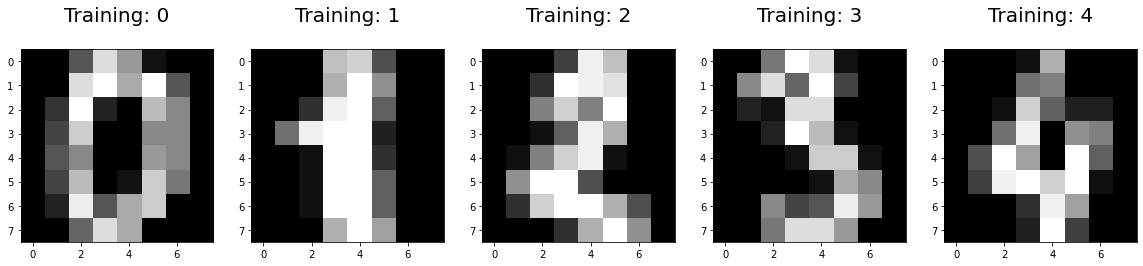

In [34]:
plt.figure(figsize=(20,4))  #this reate a figure 
for index, (image, lable) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index +1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % lable, fontsize = 20)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state = 2)
#print(X_train.shape)

[ 0.  0.  3. 12. 12.  3.  0.  0.  0.  0.  4. 16. 16.  4.  0.  0.  0.  0.
  5. 16. 16.  5.  0.  0.  0.  0. 11. 16. 15.  0.  0.  0.  0.  0. 12. 16.
 14.  0.  0.  0.  0.  0. 13. 16.  9.  0.  0.  0.  0.  0.  7. 16. 10.  1.
  0.  0.  0.  0.  5. 13. 14.  4.  0.  0.]


In [20]:
logModel = LogisticRegression()  #this create an instance of our model
logModel.fit(X_train, y_train)

C:\Users\ap114\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print(logModel.predict(X_test[0].reshape(1,-1)))
print(y_test[0])

[4]
4


In [30]:
### Prediction
y_pred = logModel.predict(X_test)
print(classification_report(y_test, y_pred))
# or
score = logModel.score(X_test, y_test)
print(score)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      0.93      0.94        44
           2       1.00      1.00      1.00        31
           3       0.94      0.92      0.93        36
           4       0.94      0.89      0.91        35
           5       0.98      0.95      0.96        43
           6       1.00      0.94      0.97        35
           7       0.97      0.97      0.97        40
           8       0.81      0.97      0.89        36
           9       0.86      0.89      0.88        28

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.95       360

0.9444444444444444


In [33]:
## See the accuracy with a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  2  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  1 25]]


Text(0.5, 103.73999999999997, 'Predicted label')

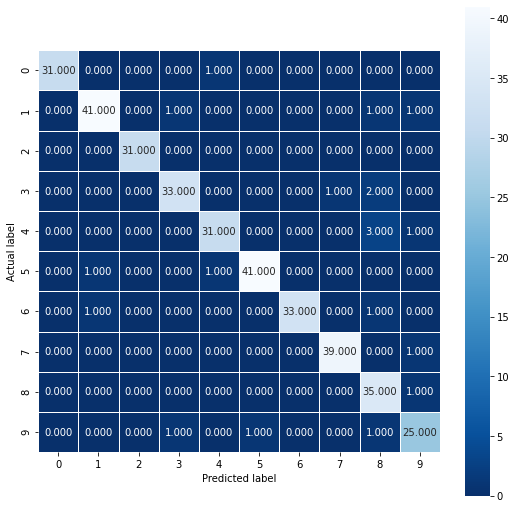

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#all_sample_title = 'Accuracy Score: (0)'. format(score)  #didn't create the score variable

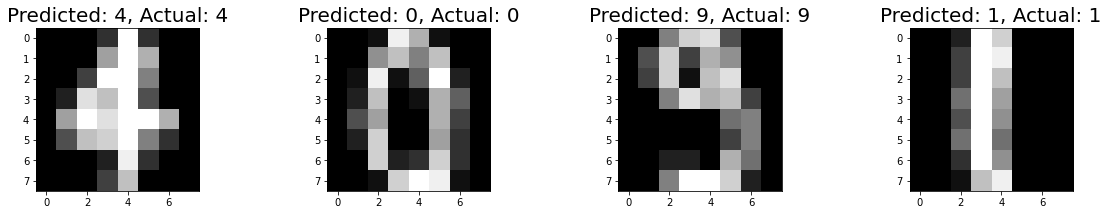

In [49]:
# Look at predicted vs actual in images
index = 0
classifiedIndex = []
for predict, actual in zip(y_pred, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(y_pred[wrong], y_test[wrong]), fontsize=20)